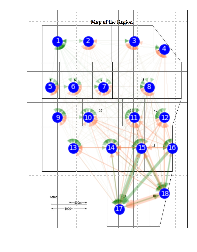

In [219]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing

# Visualize a trip matrix for origin/destination pairs using edge weights
# in a directed graph overlayed on a travel-zone map of the region 

def edge_condition(edge):
    return True # edge['origin'] < edge['destination']

def edge_color(edge):
    if edge['origin'] > edge['destination']:
        return (1,0.5,0.3, 0.3)
    return (0, 0.5, 0, 0.3)

df = pd.read_csv('HW4_data_table.csv')
df = df.iloc[1:, 2:]

G = nx.DiGraph()
edges = []

for i in range(0, 18):
    for j in range(0, 18):
        v = df.iat[i, j]
        w = max(0.04, (v / 1462.12) * 5) # hacky normalization - TODO use general fn
        edge = {
            'origin': i + 1, # for labelling
            'destination': j + 1,
            'value': v,
            'weight': w,
            'color': edge_color(edge),
        }
        if edge_condition(edge):
            edges.append(edge)

for e in edges:    
    G.add_edge(e['origin'], e['destination'])
    
# position of node corresponding to grid on image
pos = {
    1: (2, 2),
    2: (4, 2),
    3: (7, 2),
    4: (9, 2.5),
    5: (1.5, 5),
    6: (3, 5),
    7: (5, 5), 
    8: (8, 5),
    9: (2, 7),
    10: (4, 7),
    11: (7, 7),
    12: (9, 7),
    13: (3, 9),
    14: (5.5, 9),
    15: (7.5, 9),
    16: (9.5, 9),
    17: (6, 13),
    18: (9, 12),
}
   
grid_width = 10.5
grid_height = 14.25

# set positions to follow origin at bottom-left instead of top-left
pos = { node: (pos[node][0], grid_height - pos[node][1]) for node in pos}

img = plt.imread("region_map.png")
fig, ax = plt.subplots()

ax.imshow(img, extent=[0, grid_width, 0, grid_height])
nx.draw(
    G,
    ax=ax,
    pos=pos,
    with_labels=True,
    node_color='blue',
    width=[edge['weight'] for edge in edges],
    node_size=90,
    edge_color=[edge['color'] for edge in edges],
    font_size=7,
    font_color='white',
    arrows=True
)

fig.savefig('a4q1-t.png', dpi=600)
